In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/ACER/Downloads/salarydata.csv")

In [3]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 14)

In [5]:
# check the data frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [8]:
data["salary"].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
categorical_features=[feature for feature in data.columns if((data[feature].dtype=='O')&(feature not in ['salary']))]

In [10]:
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is workclass and number of categories are 9
The feature is education and number of categories are 16
The feature is marital_status and number of categories are 7
The feature is occupation and number of categories are 15
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native_country and number of categories are 42


In [12]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

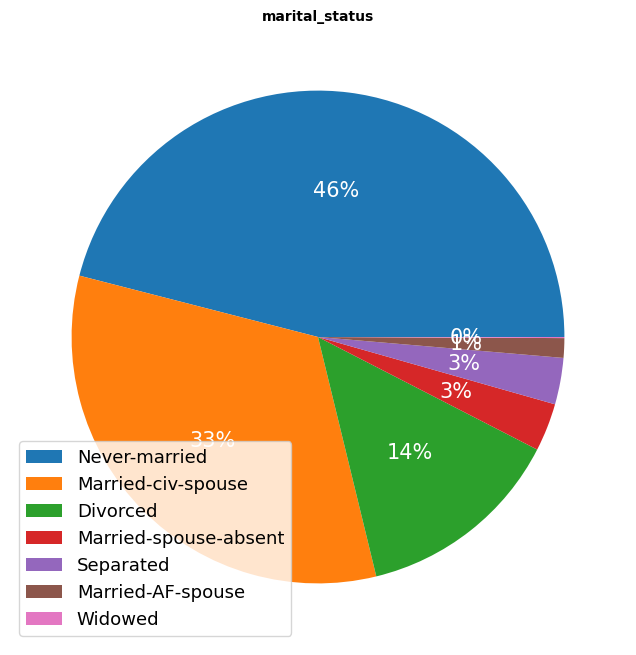

In [13]:
# pie plot
plt.figure(figsize=(8,8))
plt.title("marital_status", size=10, fontweight='bold')
plt.pie(data['marital_status'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'})
plt.legend(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], loc='lower left', fontsize=13)
plt.show()

In [14]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

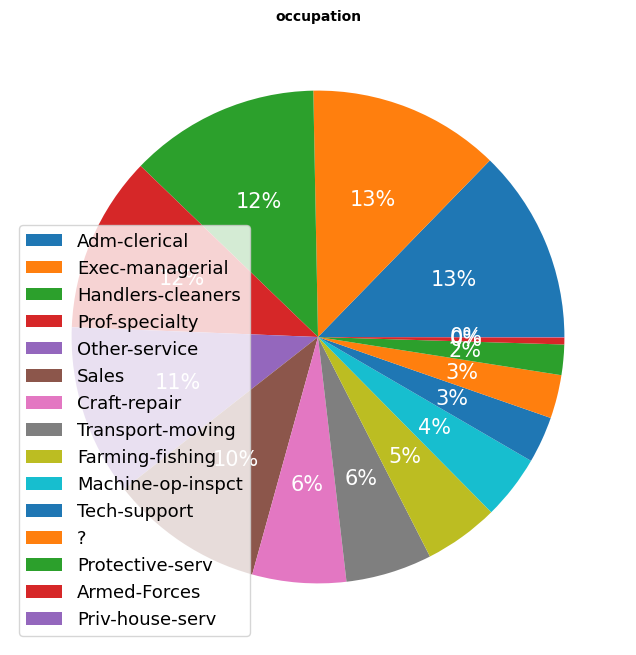

In [15]:
# pie plot
plt.figure(figsize=(8,8))
plt.title("occupation", size=10, fontweight='bold')
plt.pie(data['occupation'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'})
plt.legend(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], loc='lower left', fontsize=13)
plt.show()

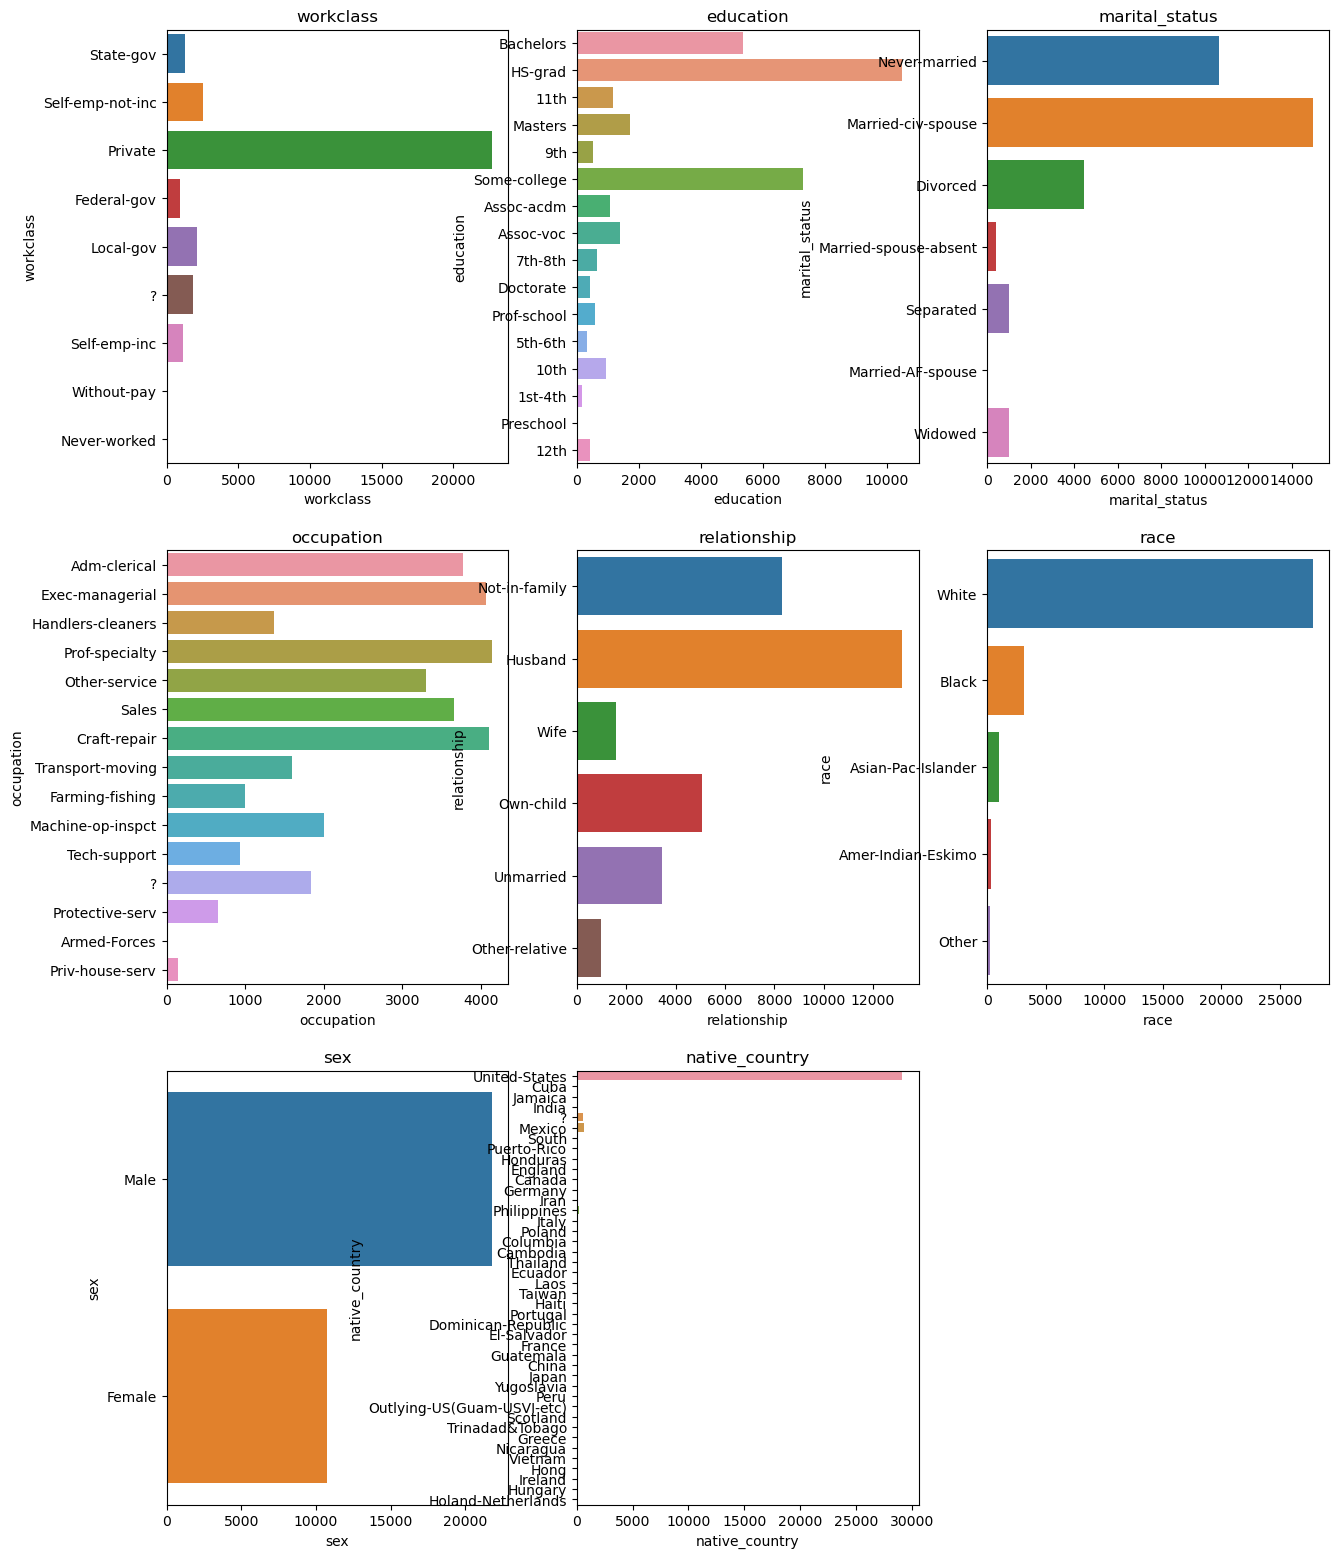

In [16]:
# check count based on categorical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_features in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_features,data=data)
    plt.xlabel(categorical_features)
    plt.title(categorical_features)
    plotnumber+=1
plt.show()    

In [17]:
# Client with job type as private records are high in given dataset and fedral-gov are very less
# Client whose education background is  higher secondary are in high numbers in given dataset
# Client who married are high in records in given dtaset and divorced are less
# Most of the Clients are male 

In [18]:
# list of numerical variable
numerical_features=[feature for feature in data.columns if((data[feature].dtypes !='O')&(feature not in ['salary']))]
print('Number of numerical variables:',len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables: 5


,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [19]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print('Discrete variable count:{}'.format(len(discrete_feature)))

Discrete variable count:1


In [20]:
# Find continuous numerical features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['salary']]
print('continuous feature count{}'.format(len(continuous_features)))

continuous feature count4


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

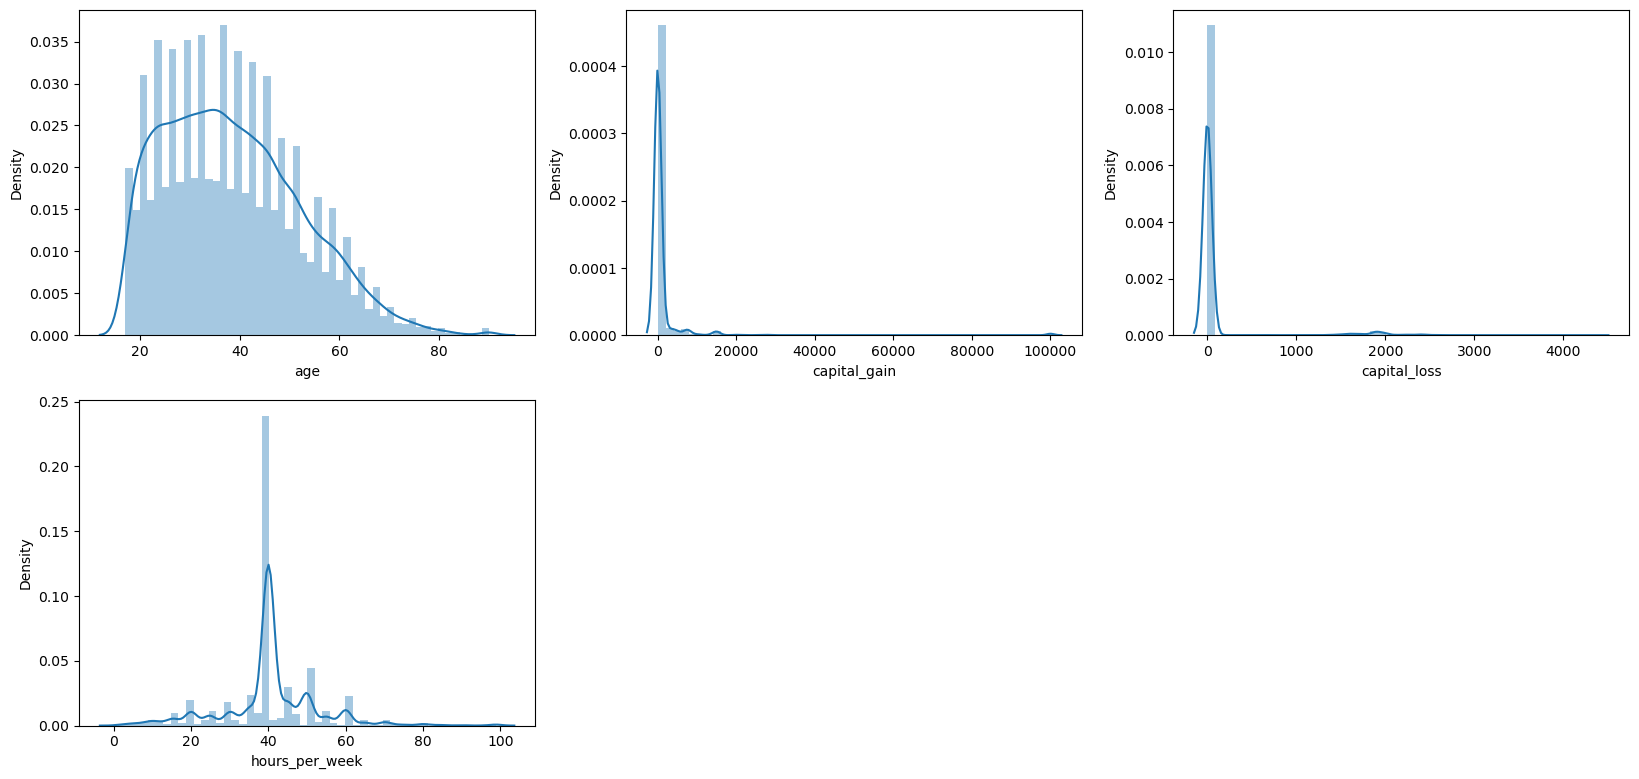

In [21]:
# plot a univariate distribution of continues observations
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_features in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_features])
    plt.xlabel(continuous_features)
    plotnumber+=1
plt.show()    

In [22]:
## it seems age ,days distributed normally
# all others are heavely skewed towards left and seems to be have some outliers 

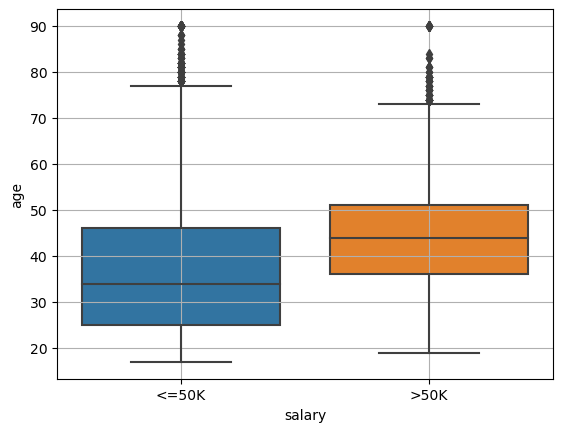

In [23]:
sns.boxplot(x='salary',y="age",data=data)
plt.grid(True)

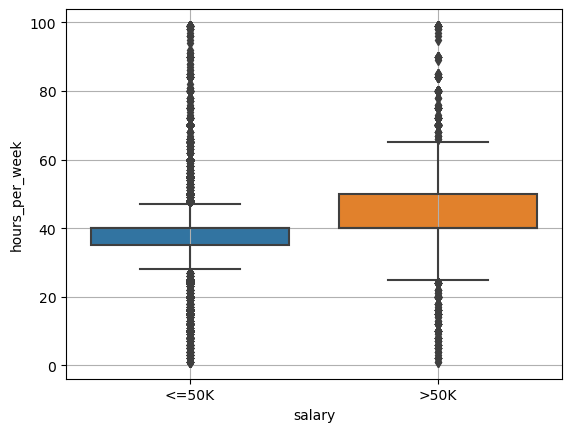

In [24]:
sns.boxplot(x='salary',y="hours_per_week",data=data)
plt.grid(True)
# people working more hours have >50 k salary

In [25]:
# removing outliers 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

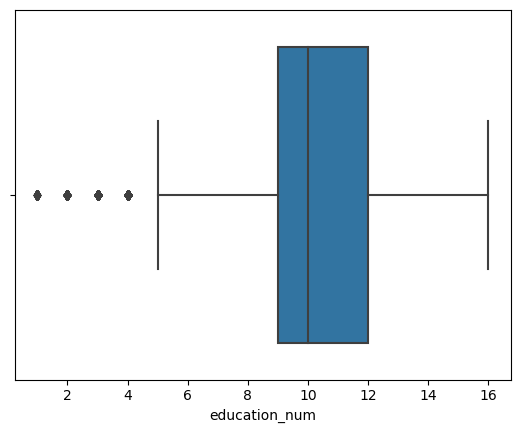

In [26]:
sns.boxplot(data['education_num'])

In [27]:
def remove_outlier_education_num(data):
    IQR=data['education_num'].quantile(0.75) - data['education_num'].quantile(0.25)
    
    lower_range = data['education_num'].quantile(0.25)-(1.5*IQR)
    upper_range = data['education_num'].quantile(0.75)+(1.5*IQR)
    
    data.loc[data['education_num']<=lower_range, 'education_num']=lower_range
    data.loc[data['education_num']>=upper_range, 'education_num']=upper_range

In [28]:
remove_outlier_education_num(data)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

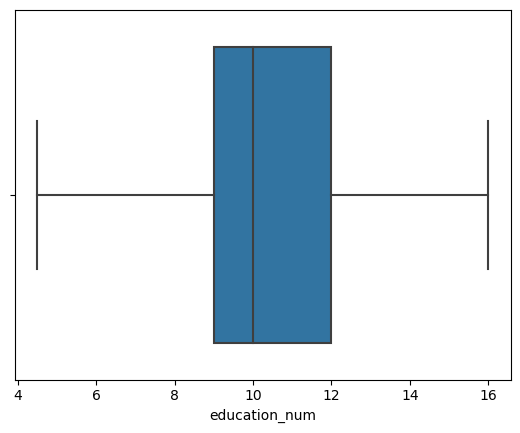

In [29]:
sns.boxplot(data['education_num'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

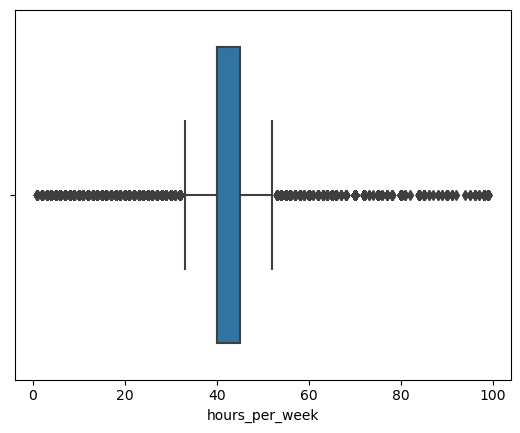

In [30]:
sns.boxplot(data['hours_per_week'])

In [31]:
def remove_outlier_hours_per_week(data):
    IQR=data['hours_per_week'].quantile(0.75) - data['hours_per_week'].quantile(0.25)
    
    lower_range = data['hours_per_week'].quantile(0.25)-(1.5*IQR)
    upper_range = data['hours_per_week'].quantile(0.75)+(1.5*IQR)
    
    data.loc[data['hours_per_week']<=lower_range, 'hours_per_week']=lower_range
    data.loc[data['hours_per_week']>=upper_range, 'hours_per_week']=upper_range

In [32]:
remove_outlier_hours_per_week(data)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

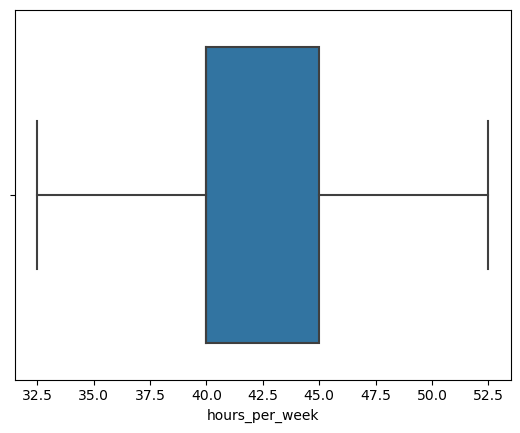

In [33]:
sns.boxplot(data['hours_per_week'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

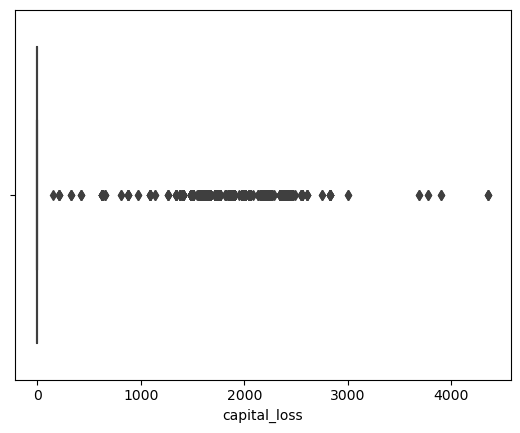

In [34]:
sns.boxplot(data['capital_loss'])

In [35]:
def remove_outlier_capital_loss(data):
    IQR=data['capital_loss'].quantile(0.75) - data['capital_loss'].quantile(0.25)
    
    lower_range = data['capital_loss'].quantile(0.25)-(1.5*IQR)
    upper_range = data['capital_loss'].quantile(0.75)+(1.5*IQR)
    
    data.loc[data['capital_loss']<=lower_range, 'capital_loss']=lower_range
    data.loc[data['capital_loss']>=upper_range, 'capital_loss']=upper_range

In [36]:
remove_outlier_capital_loss(data)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

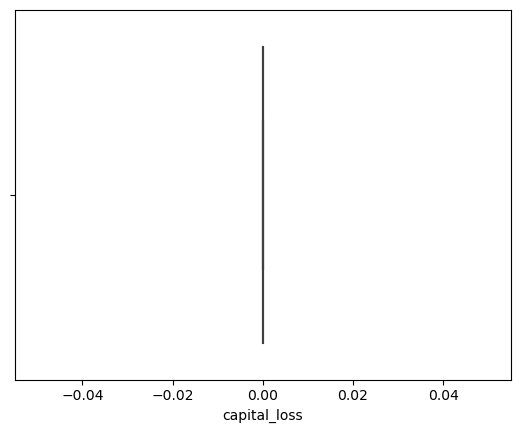

In [37]:
sns.boxplot(data['capital_loss'])

In [38]:
#correlation between attributes

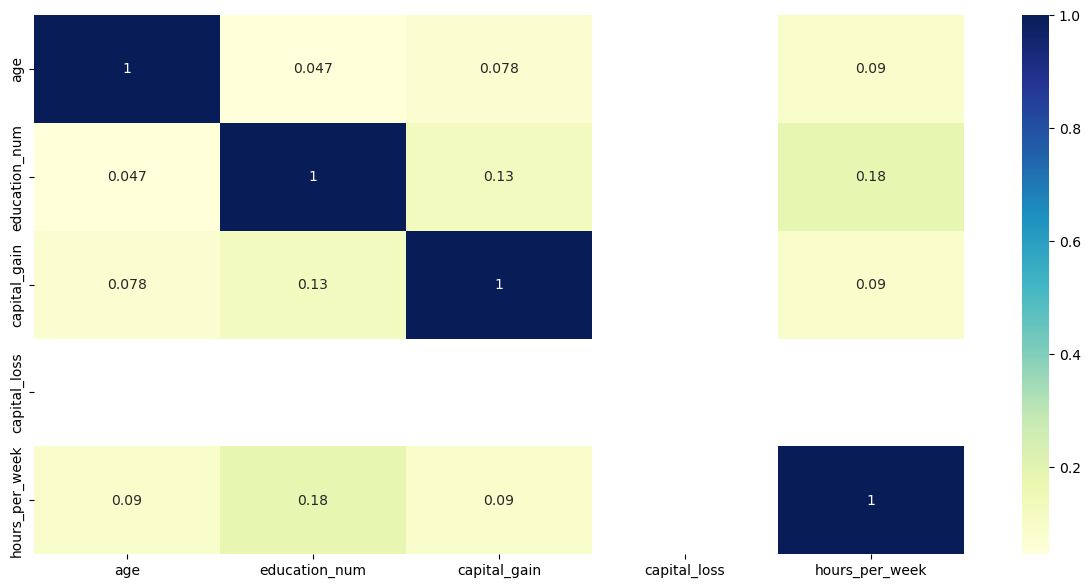

In [39]:
cor_mat=data.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='YlGnBu')
plt.show()

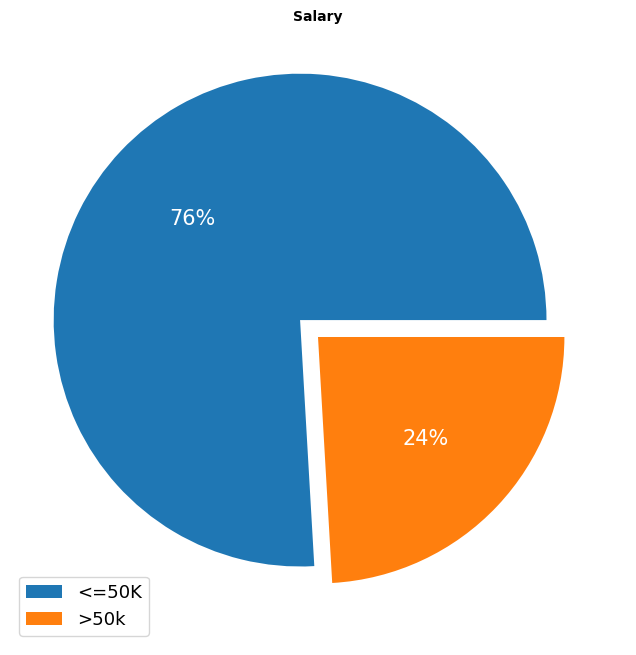

In [40]:
# pie plot
plt.figure(figsize=(8,8))
plt.title("Salary", size=10, fontweight='bold')
plt.pie(data['salary'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['<=50K', '>50k'], loc='lower left', fontsize=13)
plt.show()

In [41]:
data['salary'].groupby(data['salary']).count()

salary
<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [42]:
# not balanced

In [43]:
from imblearn.under_sampling import RandomUnderSampler
X = data.drop(['salary'], axis=1)
y = data['salary']

In [44]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


### Feature Engineering

In [45]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [46]:
data['workclass']=np.where(data['workclass'] =='?','Missing',data['workclass'])
label_enco_workclass={value:key for key, value in enumerate(data['workclass'].unique())}
data['workclass']=data['workclass'].map(label_enco_workclass)

In [47]:
data['workclass'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [48]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [49]:
label_enco_education={value:key for key ,value in enumerate(data['education'].unique())}
data['education']=data['education'].map(label_enco_education)

In [50]:
data['education'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [51]:
data['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [52]:
label_enco_marr={value:key for key ,value in enumerate(data['marital_status'].unique())}
data['marital_status']=data['marital_status'].map(label_enco_marr)

In [53]:
data['marital_status'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [54]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [55]:
data['occupation']=np.where(data['occupation'] =='?','Missing',data['occupation'])
label_enco_occupation={value:key for key, value in enumerate(data['occupation'].unique())}
data['occupation']=data['occupation'].map(label_enco_occupation)

In [56]:
data['occupation'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [57]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [58]:
label_enco_rel={value:key for key ,value in enumerate(data['relationship'].unique())}
data['relationship']=data['relationship'].map(label_enco_rel)

In [59]:
data['relationship'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [60]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [61]:
label_enco_race={value:key for key ,value in enumerate(data['race'].unique())}
data['race']=data['race'].map(label_enco_race)

In [62]:
data['race'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [63]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [64]:
label_enco_sex={value:key for key ,value in enumerate(data['sex'].unique())}
data['sex']=data['sex'].map(label_enco_sex)

In [65]:
data['sex'].unique()

array([0, 1], dtype=int64)

In [66]:
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [67]:
data['native_country']=np.where(data['native_country'] =='?','Missing',data['native_country'])
label_enco_native={value:key for key, value in enumerate(data['native_country'].unique())}
data['native_country']=data['native_country'].map(label_enco_native)

In [68]:
data['native_country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

In [69]:
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,0,2174,0,40.0,0,<=50K
1,50,1,0,13.0,1,1,1,0,0,0,0,32.5,0,<=50K
2,38,2,1,9.0,2,2,0,0,0,0,0,40.0,0,<=50K
3,53,2,2,7.0,1,2,1,1,0,0,0,40.0,0,<=50K
4,28,2,0,13.0,1,3,2,1,1,0,0,40.0,1,<=50K


### SMOT

In [70]:
from imblearn.under_sampling import RandomUnderSampler
X = data.drop(['salary'], axis=1)
y = data['salary']

In [71]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

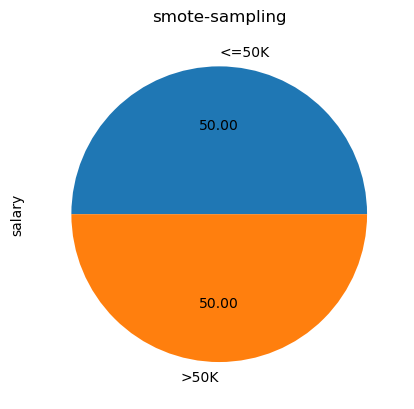

In [72]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

ax = y_sm.value_counts().plot.pie(autopct='%.2f')
_= ax.set_title("smote-sampling")

In [73]:
y_sm.value_counts()

<=50K    24720
>50K     24720
Name: salary, dtype: int64

In [74]:
# BALANCED

### scaling

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc=StandardScaler()

In [77]:
from imblearn.under_sampling import RandomUnderSampler
X= data.drop(['salary'], axis=1)
y = data['salary']

In [78]:
y_sm.value_counts()

<=50K    24720
>50K     24720
Name: salary, dtype: int64

In [79]:
X=sc.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size = 0.2, random_state = 42)

### MinMax Scaling

In [81]:
# define the pipeline
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


trans = MinMaxScaler()
min_max = MinMaxScaler(feature_range= (0,1))
X_train1 = min_max.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train1)
X_train1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.0,39552.000000,39552.000000
mean,0.319782,0.283949,0.218721,0.533025,0.174770,0.312430,0.268502,0.042147,0.236195,0.020891,0.0,0.482850,0.027976
std,0.175853,0.153415,0.223903,0.217443,0.176285,0.234431,0.248113,0.137613,0.424749,0.105595,0.0,0.312712,0.115785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.191781,0.250000,0.066667,0.391304,0.166667,0.071429,0.200000,0.000000,0.000000,0.000000,0.0,0.375000,0.000000
50%,0.315068,0.250000,0.133333,0.478261,0.166667,0.285714,0.200000,0.000000,0.000000,0.000000,0.0,0.375000,0.000000
75%,0.438356,0.250000,0.333333,0.739130,0.166667,0.428571,0.200000,0.000000,0.000000,0.000000,0.0,0.809302,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [83]:
object= StandardScaler()
 
# Splitting the independent and dependent variables

 
# standardization 
X_train2= object.fit_transform(X_train) 
X_train2= pd.DataFrame(X_train2)
X_train2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,3.955200e+04,39552.0,3.955200e+04,3.955200e+04
mean,2.073416e-16,3.648309e-16,-8.116064e-16,-5.071147e-16,-6.604777e-16,-2.000383e-15,5.997385e-16,1.210593e-15,-6.569213e-17,-2.503112e-15,0.0,3.740996e-16,-5.047203e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,0.0,1.000013e+00,1.000013e+00
min,-1.818480e+00,-1.850874e+00,-9.768682e-01,-2.451356e+00,-9.914202e-01,-1.332733e+00,-1.082191e+00,-3.062761e-01,-5.560893e-01,-1.978468e-01,0.0,-1.544092e+00,-2.416201e-01
25%,-7.278930e-01,-2.212907e-01,-6.791170e-01,-6.517649e-01,-4.596748e-02,-1.028040e+00,-2.760964e-01,-3.062761e-01,-5.560893e-01,-1.978468e-01,0.0,-3.448900e-01,-2.416201e-01
50%,-2.680144e-02,-2.212907e-01,-3.813658e-01,-2.518556e-01,-4.596748e-02,-1.139596e-01,-2.760964e-01,-3.062761e-01,-5.560893e-01,-1.978468e-01,0.0,-3.448900e-01,-2.416201e-01
75%,6.742901e-01,-2.212907e-01,5.118879e-01,9.478721e-01,-4.596748e-02,4.954272e-01,-2.760964e-01,-3.062761e-01,-5.560893e-01,-1.978468e-01,0.0,1.043954e+00,-2.416201e-01
max,3.868152e+00,4.667459e+00,3.489400e+00,2.147600e+00,4.681296e+00,2.932974e+00,2.948283e+00,6.960570e+00,1.798272e+00,9.272394e+00,0.0,1.653780e+00,8.395219e+00


In [84]:
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy Not Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy Not Scaled: 0.827 (0.005)


In [85]:
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy after Max Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy after Max Scaled: 0.821 (0.004)


In [86]:
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy after Standard Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy after Standard Scaled: 0.827 (0.005)


In [87]:
print('Train data shape:{}'.format(X_train.shape))
print('Train data shape:{}'.format(X_test.shape))

Train data shape:(39552, 13)
Train data shape:(9888, 13)


In [88]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
y_pred=log_model.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [91]:
print('Accuracy is :',accuracy_score(y_test,y_pred))


Accuracy is : 0.7004449838187702


In [92]:
confusion_matrix(y_test,y_pred)

array([[3276, 1662],
       [1300, 3650]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print('Classification Report:\n{}'.format(classification_report(y_test,y_pred)),"\n")

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.72      0.66      0.69      4938
        >50K       0.69      0.74      0.71      4950

    accuracy                           0.70      9888
   macro avg       0.70      0.70      0.70      9888
weighted avg       0.70      0.70      0.70      9888
 



In [96]:
result={
    'Actual':y_test,
    'Predicted':y_pred
}

In [97]:
pd.DataFrame(result)

,Actual,Predicted
32168,<=50K,<=50K
199,<=50K,>50K
16026,<=50K,<=50K
10791,<=50K,<=50K
33656,>50K,>50K
...,...,...
30612,<=50K,<=50K
33730,>50K,<=50K
4546,>50K,>50K
26559,>50K,<=50K


In [98]:
import pickle
#open a file ,where want to store the data
file=open('log_model.pkl','wb')
#dump information to that file
pickle.dump(log_model,file)